In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/loan_prediction.csv")
df.head(5)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
#Dropping the Loan_ID Column labels
df = df.drop('Loan_ID', axis = 1)
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [4]:

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#prints True if any Duplicated values are present in the Data
df.duplicated().any()


False

In [6]:
cl = [x for x in df.columns[:-1] if (df[x].dtype == 'object')]
print(cl)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


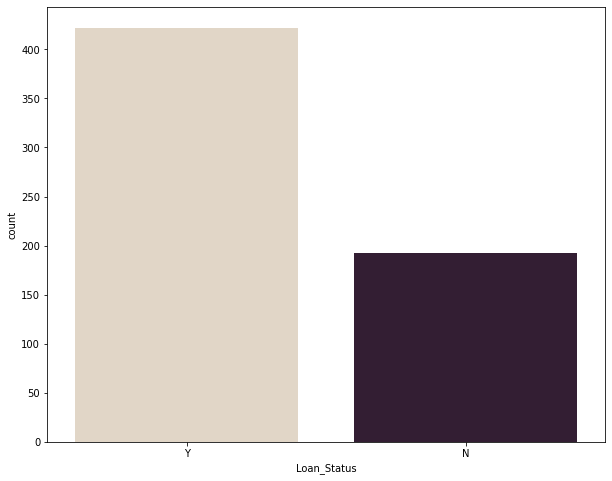

In [7]:
plt.subplots(figsize = (10, 8))
sns.countplot(df.loc[:, "Loan_Status"], palette='ch:.25')
plt.show()



In [8]:
print("Percentage of Yes Class :", round(df['Loan_Status'].value_counts()[0]/len(df), 2))
print("Percentage of No class  :", round(df['Loan_Status'].value_counts()[1]/len(df), 2))

Percentage of Yes Class : 0.69
Percentage of No class  : 0.31


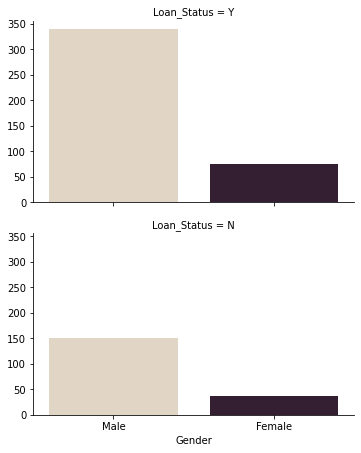

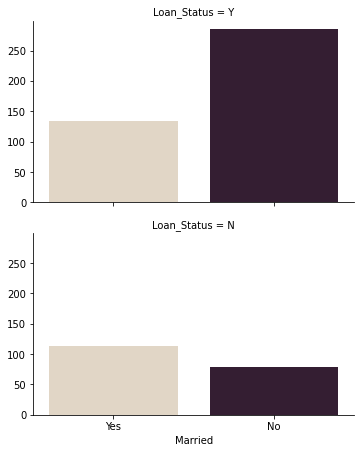

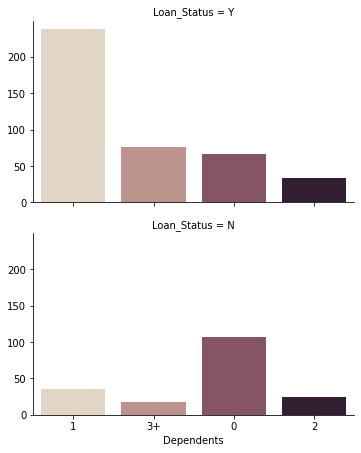

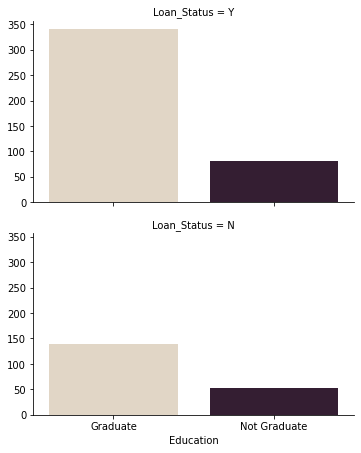

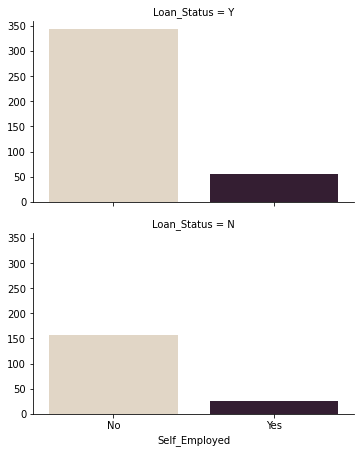

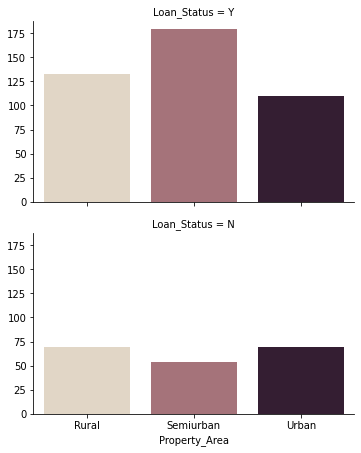

In [9]:
import warnings 
warnings.filterwarnings("ignore")


for cn in cl:
  grid = sns.FacetGrid(df, 'Loan_Status', palette='ch:.26', size = 3.2, aspect= 1.6)
  grid.map(sns.countplot, cn, palette='ch:.26')
  
  plt.show()
  print(20*'===')

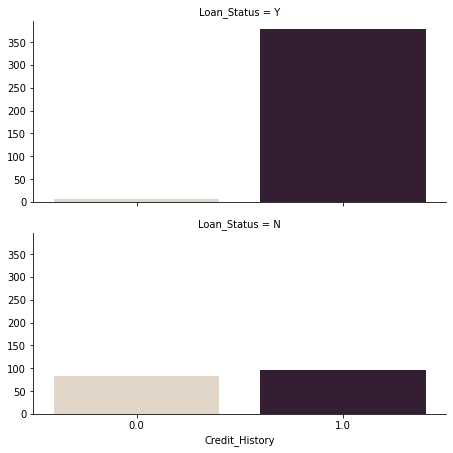

In [10]:
grid = sns.FacetGrid(df, 'Loan_Status', size = 3.2, aspect= 2)
grid.map(sns.countplot, 'Credit_History', palette = 'ch:.25')
plt.show()

# **Observations:**
1. In case of Gender there are more chances for Loan Sanction for Male Category.

2. In case of Married there are more chances for Loan Sanction for Bachelors than Married Couples.
 
3. In case of Dependents the loan is sanctioned for the people having 1 Dependent.  

4. In case of Education the loan is sanctioned to the people who have Graduation Degree.

5. In case of Self Employed the loan is sanctioned more for the people who are not self_employed.

6. In case of Property Area the people having more semi Urban property are given a loan than other people having other properties.

7. In case of Credit History people having credit history value 1 are given a loan. 

In [11]:
#Now coming to the numerical variables. 
df.groupby('Loan_Status').median()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


# **Observation :**
 from the above chart the loan is sanctioned to those who has high coapplicant income high.

In [12]:
df.isnull().sum().sort_values(ascending = False)


Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [13]:
#converting credit history into categorical
df['Credit_History'] = df.Credit_History.astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


# **Segregating the Categorical and Numerical variables into categorical and numerical Dataframes**


In [14]:
#Segregating the Categorical
categorical = df.loc[:,df.dtypes==object]
categorical.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [15]:
#Segregating the Numerical
numerical = df.loc[:, ((df.dtypes== 'int64') | (df.dtypes=='float64'))]
numerical.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [16]:
#Filling the missing Values and checking if there are any duplicate values exist categorical Data 
categorical = categorical.apply(lambda x :x.fillna(x.value_counts().index[0]))
categorical.duplicated().any()

True

In [17]:
#Filling the missing Values and checking if there are any Null values exist in Numerical Data 
numerical.fillna(method = 'bfill',inplace=True)
numerical.isnull().sum().any()

False

In [18]:
#Segregating the Target variable from the DataFrame

target_values = {'Y': 0, 'N': 1}
target = categorical['Loan_Status']
categorical.drop('Loan_Status',axis = 1,  inplace=True)
target.map(target_values)
target.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [19]:
#labelling all the Categorical Data 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
  categorical[i] = le.fit_transform(categorical[i])
categorical.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [20]:
#Gathering All the Tranformed Data to single DataFrame
df = pd.concat([categorical, numerical, target], axis = 1)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849,0.0,128.0,360.0,Y
1,1,1,1,0,0,1,0,4583,1508.0,128.0,360.0,N
2,1,1,0,0,1,1,2,3000,0.0,66.0,360.0,Y
3,1,1,0,1,0,1,2,2583,2358.0,120.0,360.0,Y
4,1,0,0,0,0,1,2,6000,0.0,141.0,360.0,Y


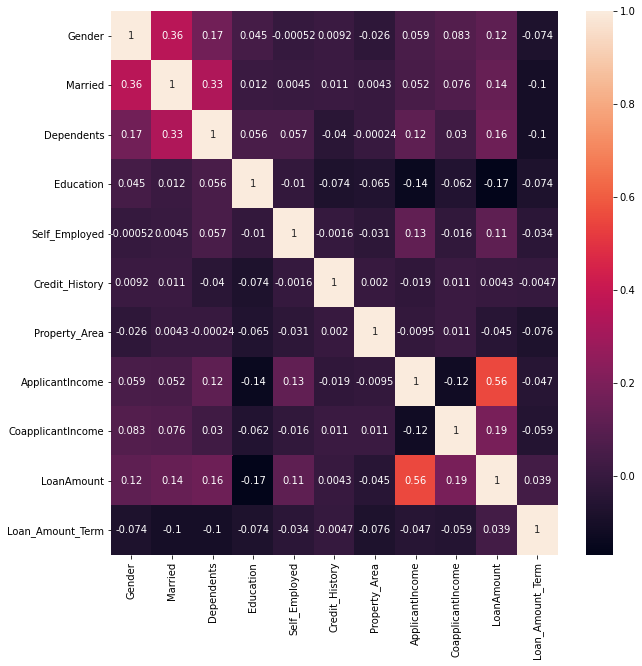

In [21]:
plt.subplots(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns,annot=True)

There seems to be highly positive correlation between loam amount and Applicant Income


In [22]:
#marking the labels
X = df.loc[:, df.columns[0:-1]]
y = df.loc[:,df.columns[-1]]
print(X.shape)
print(y.shape)

(614, 11)
(614,)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0 )




In [24]:
print('X_train shape ', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape ', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape  (491, 11)
y_train shape (491,)
X_test shape  (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.67617108 0.32382892]
ratio of target in y_test : [0.73170732 0.26829268]
ratio of target in original_data : [0.68729642 0.31270358]


In [0]:
#Building the machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression: ' : LogisticRegression(random_state=42), 
    'KNeighborsClassifier :' : KNeighborsClassifier(),
    'SVC:' : SVC(random_state=42),
    'DecisionTreeClassifier: ': DecisionTreeClassifier(max_depth=1,random_state=42)
}

In [0]:
from sklearn.metrics import accuracy_score, classification_report
pre = {}
report = {}
def model_evaluate(name ,y_true, y_pred, retu=False):
    pre[name] =  accuracy_score(y_true, y_pred)
    report[name] = classification_report(y_true, y_pred)
    
    

In [0]:
def train_eval_train(models, X, y):
    for name, model in models.items():
        model.fit(X, y)
        model_evaluate(name, y, model.predict(X))
        
        
train_eval_train(models, X_train, y_train)


In [28]:
#printing the model Accuracy ad Reports of the model
for model, accuracy in pre.items():
  print(model,": ", accuracy, end = '\n\n')


for model, accuracy in report.items():
  print(model, end= '\n')
  print(accuracy)

LogisticRegression:  :  0.7718940936863544

KNeighborsClassifier : :  0.7352342158859471

SVC: :  0.6802443991853361

DecisionTreeClassifier:  :  0.8044806517311609

LogisticRegression: 
              precision    recall  f1-score   support

           N       0.78      0.41      0.54       159
           Y       0.77      0.95      0.85       332

    accuracy                           0.77       491
   macro avg       0.78      0.68      0.69       491
weighted avg       0.77      0.77      0.75       491

KNeighborsClassifier :
              precision    recall  f1-score   support

           N       0.64      0.42      0.50       159
           Y       0.76      0.89      0.82       332

    accuracy                           0.74       491
   macro avg       0.70      0.65      0.66       491
weighted avg       0.72      0.74      0.72       491

SVC:
              precision    recall  f1-score   support

           N       1.00      0.01      0.02       159
           Y       0.6

#In the above models Logistic regression has the highest accuracy while lowest accuracy is obtained through the SVM classifier


In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)



# Bagging
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=29), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=29
)

bag_clf.fit(X_train, y_train)
pred_bagging = bag_clf.predict(X_test)
print(pred_bagging[2])
print(pred_dt[2])

#Boosting
# Boosting
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    learning_rate=0.5, random_state=50
)

ada_clf.fit(X_train, y_train)
pred_boosting = ada_clf.predict(X_test)
print(pred_boosting[2])

Y
Y
Y


In [30]:
print("Bagging accuracy:",accuracy_score(y_test, pred_bagging))
print("Boosting accuracy:",accuracy_score(y_test, pred_boosting))
print("\n\n",classification_report(y_test, pred_bagging))
print("\n\n",classification_report(y_test, pred_boosting))

Bagging accuracy: 0.8211382113821138
Boosting accuracy: 0.8292682926829268


               precision    recall  f1-score   support

           N       0.82      0.42      0.56        33
           Y       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123



               precision    recall  f1-score   support

           N       0.75      0.55      0.63        33
           Y       0.85      0.93      0.89        90

    accuracy                           0.83       123
   macro avg       0.80      0.74      0.76       123
weighted avg       0.82      0.83      0.82       123



In [31]:
print(pred_dt.shape)

(123,)


In [32]:
print("Decision Tree\n",cm(y_test, pred_dt))
print("\nBagging\n",cm(y_test, pred_bagging))
print("\nBoosting\n",cm(y_test, pred_boosting))

Decision Tree
 [[19 14]
 [25 65]]

Bagging
 [[14 19]
 [ 3 87]]

Boosting
 [[18 15]
 [ 6 84]]


Through Bagging and boosting there was increase in accuracy rate.